In [1]:
%load_ext autoreload
%autoreload 2

import casadi as ca
import matplotlib.pyplot as plt 
from autodiff_sys import Sys
from helper_fns import *
k0 = ca.MX.sym('k0')
m1 = ca.MX.sym('m1')
b1 = ca.MX.sym('b1')
k1 = ca.MX.sym('k1')
m2 = ca.MX.sym('m2')
b2 = ca.MX.sym('b2')
k2 = ca.MX.sym('k2')
p = [k0, m1, b1, k1, m2, b2, k2]
Gk0 = Sys([k0],[1])
Gm1 = Sys([1],[m1, 0, 0])
Gbk1 = Sys([b1, k1], [1])
Gk1 = Sys([k1],[1])
Gm2 = Sys([1],[m2, 0, 0])
Gbk2 = Sys([b2, k2], [1])
Gmbk2 = Gm2/(1+Gm2*Gbk2)
Gmbk2bk1 = Gbk1/(1+Gbk1*Gmbk2)
G_x_to_f = Gk1/(1+Gk1*Gmbk2)    # From q1 to force
G_u_to_x = Gm1/(1+Gm1*Gmbk2bk1) # From \tau_m to force
G_x_to_f2 = Gk0/(1+Gk0*G_u_to_x)
        
print(G_x_to_f)
A, B, C = tf2ss(G_u_to_x.num, G_u_to_x.den)
print(A)
print(B)
print(C)

num: [MX((k1*sq(m2))), MX((k1*(m2*b2))), MX((k1*(m2*k2))), MX(0), MX(0)] den: [MX(sq(m2)), MX((m2*b2)), MX(((m2*k2)+(k1*m2))), MX(0), MX(0)]
Cancelling pole/zero at 0
Cancelling pole/zero at 0
Cancelling pole/zero at 0
Cancelling pole/zero at 0
@1=(m2*k2), @2=sq(m2), @3=(m1*(m1*@2)), @4=(m2*b2), ((((horzcat(horzcat(zeros(3x1), ones(3x3,3nz))', zeros(4x1))'[3] = (-((m1*(k1*@1))/@3)))[5] = (-((m1*((b1*@1)+(k1*@4)))/@3)))[7] = (-((m1*((m1*(@1+(k1*m2)))+((b1*@4)+(k1*@2))))/@3)))[9] = (-((m1*((m1*(@4+(b1*m2)))+(b1*@2)))/@3)))
(zeros(4x1)[3] = 1)
@1=(m1*sq(m2)), @2=(m1*@1), ((((zeros(1x4)[0] = ((m1*((m2*k2)+(k1*m2)))/@2))[1] = ((m1*((m2*b2)+(b1*m2)))/@2))[2] = (@1/@2))[3] = 0)


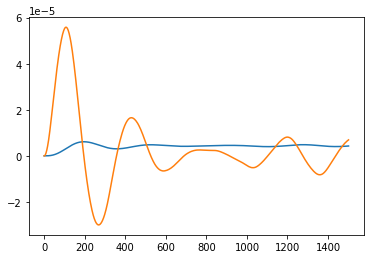

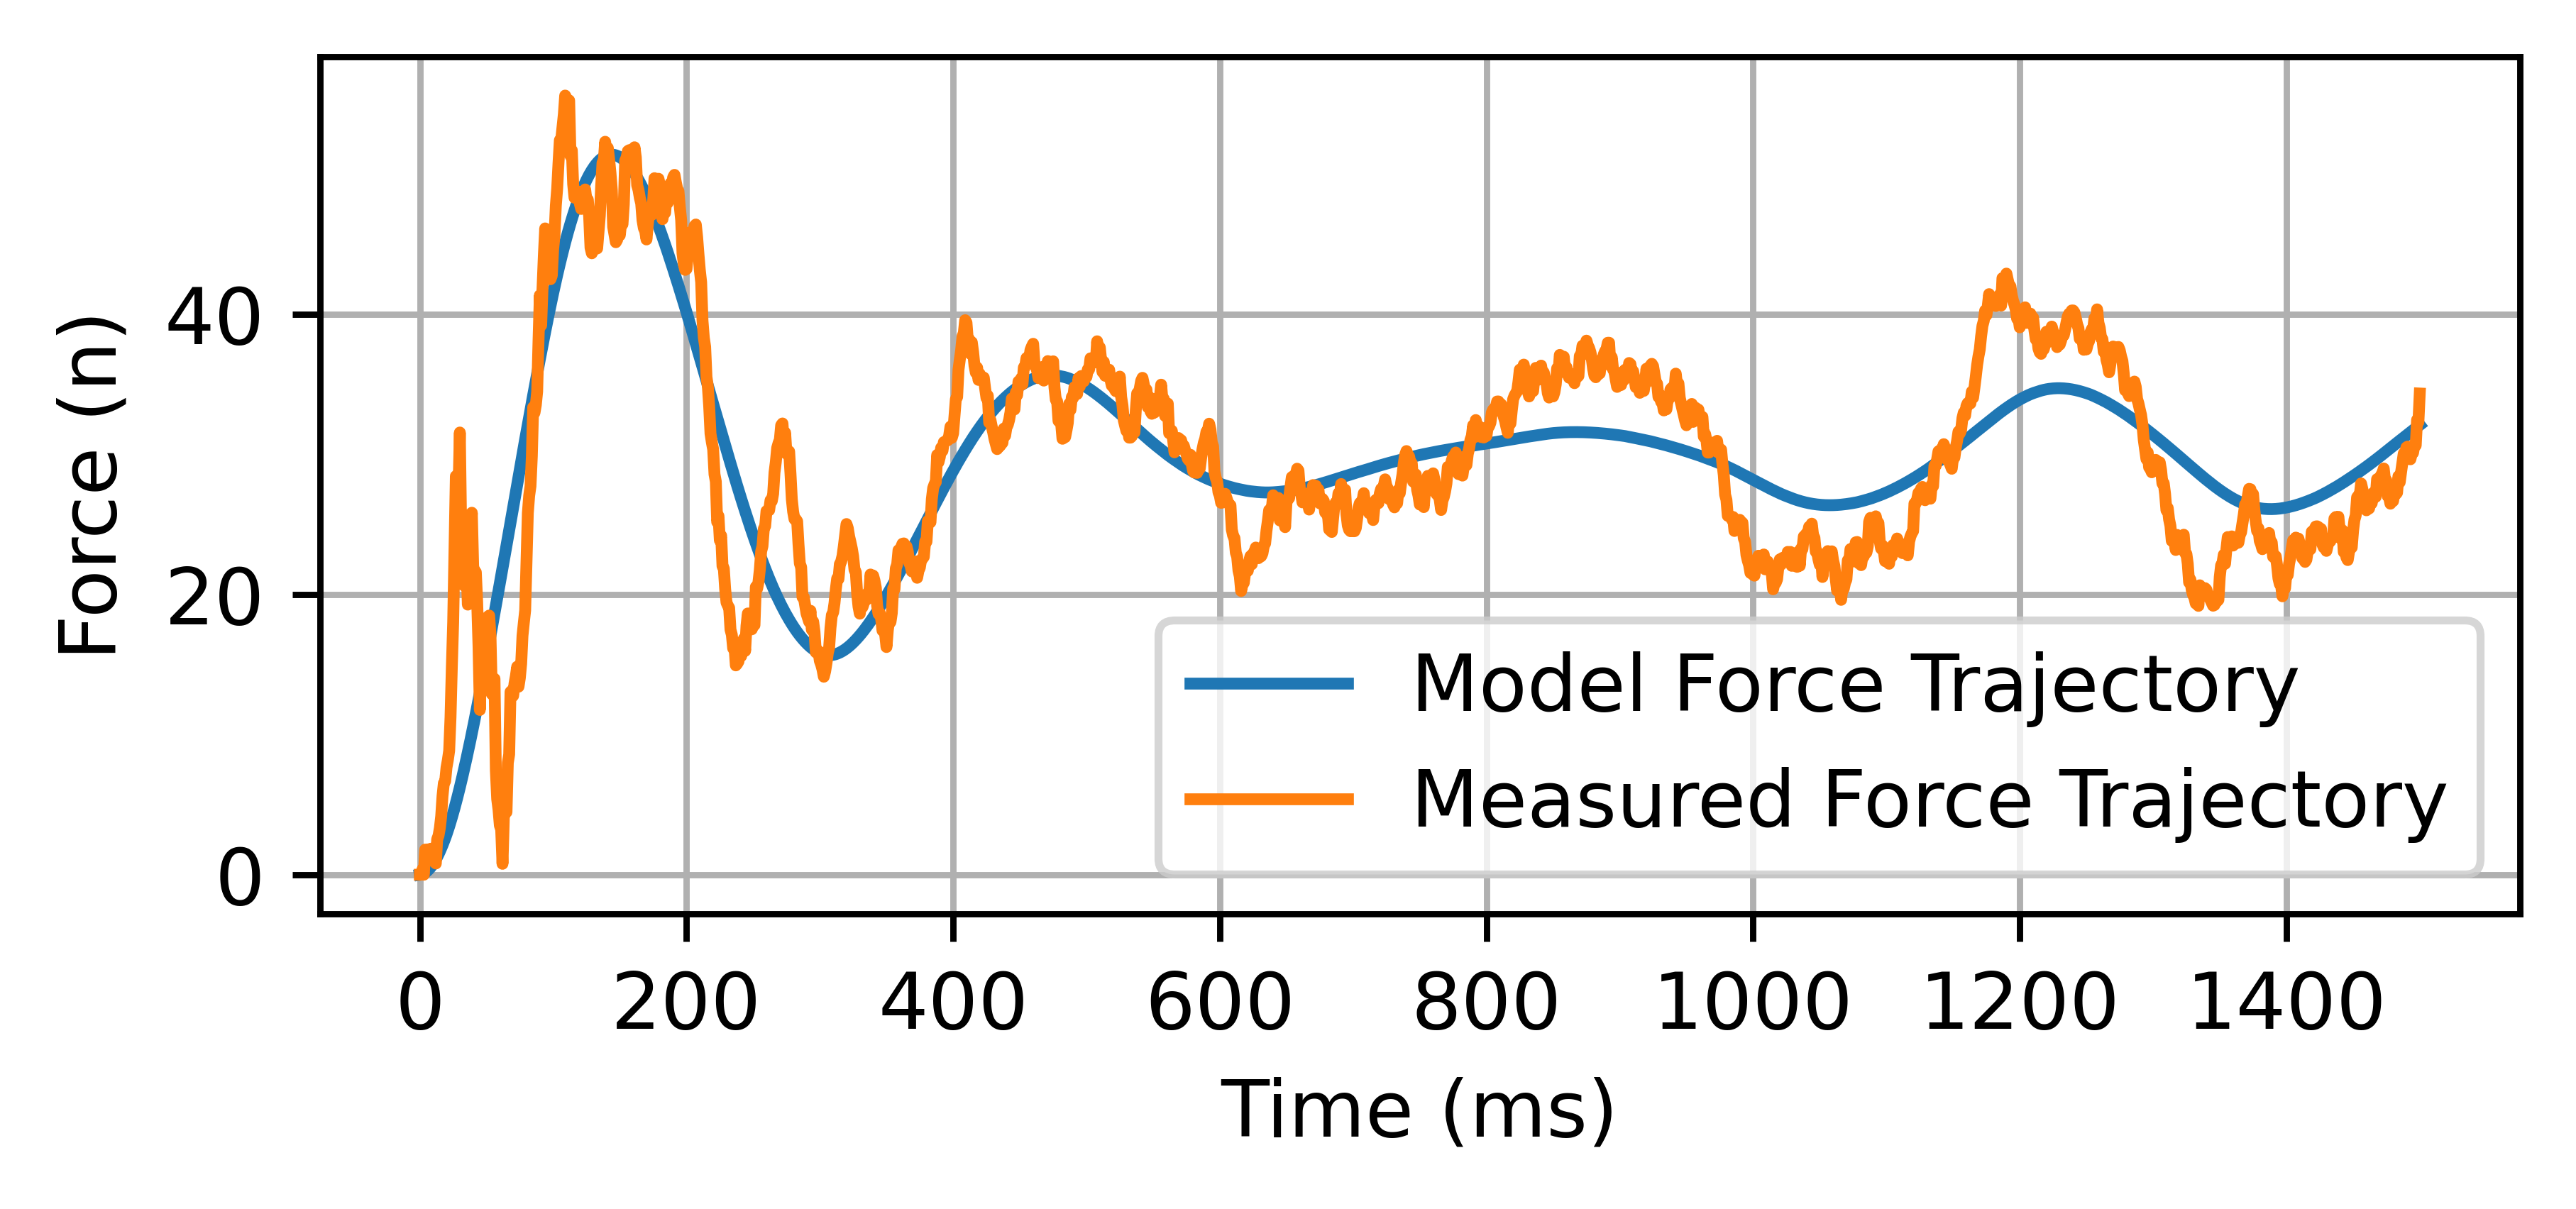

In [119]:
#         K0,           m1,  b1,          k1,         m2,          b2,      k2
#p0 = [17434.3, 8.76996e-1, 3.46538e+6, 0.542849, 3.75313e+6, 5.22035e+6, 7.67087]
#p0 = [26571.5, 12.1303, 150.895, 52286.7, 6.811e+07, 3.30407e+09, 1.15195e+12]
#u, ym = import_csv('data/yellow_feet_coll.csv')

x0 = ca.MX.zeros(2,1)

#p0 = [9.89975e+14, 9.89975e+14, 9.89975e+14, 174457.9, 20.03817, 305.8104, 2629.28]
#x0[0] = -3e-8
#u, ym = import_csv('data/flex_jt_imco.csv')

p0 = [6.01438e+07, 6.01438e+07, 5.94275e+09, 26180.9, 69.3393, 1079.1, 18153.7]
u, ym = import_csv('data/yellow_feet_imco.csv')

#p0 = [1.47727e+08, 1.47727e+08, 1.41505e+10, 13615.3, 63.9755, 1866.55, 7347.23]
#u, ym = import_csv('data/yellow_surf_imco.csv')

y, x_traj = G_x_to_f.simulate(u, x0, dt=0.001)

y_eval = ca.Function('y_eval', p,y)
x_eval = ca.Function('x_eval', p,x_traj)
y_num = y_eval(*p0)
x_traj_num = x_eval(*p0)
x_traj_num = [np.squeeze(x_tr.full()) for x_tr in x_traj_num]
plt.figure()
plt.plot(x_traj_num)
plt.show()
plt.figure(figsize=(5,2), dpi = 800)
plt.plot(y_num, label='Model Force Trajectory')
plt.plot(ym, label = 'Measured Force Trajectory')
plt.xlabel('Time (ms)')
plt.ylabel('Force (n)')
plt.grid(True)
plt.legend()
plt.show()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        7
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        7
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

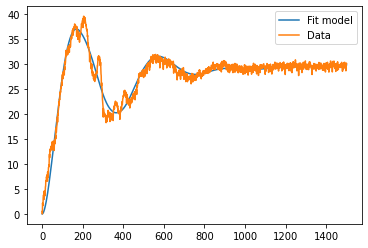

In [111]:
#um, ym = import_csv('data/yellow_feet_coll.csv')
#um,ym = import_csv('data/yellow_feet_imco.csv')
um, ym = import_csv('data/yellow_surf_imco.csv')
#um, ym = import_csv('data/flex_jt_imco.csv')
#um = um[:1100]
#ym = ym[:1100]
x0 = ca.MX.zeros(2,1)
p0 = [9.89975e+2, 9.89975e+2, 9.89975e+4, 1747.9, 18.03817, 275.8104, 2729.28]
y, _ = G_x_to_f.simulate(um, x0, dt=0.001)

#x0 = ca.MX.zeros(4,1)
#p0 = [17296.6, 1.25968e+03, 2e4, 4.79407e+06, 7.32443e+06, 2.38322e+08, 1e+8]
#y, _ = G_x_to_f2.simulate(um, x0, dt=0.001)
nlp = {'x':ca.vertcat(*p), 'f':ca.sumsqr(ca.vertcat(*y)-ym)}
solver = ca.nlpsol('solver','ipopt',nlp)
soln = solver(x0 = p0, lbx = -10, ubx = 1e15)
print(soln['x'])
y_eval = ca.Function('y_eval', [ca.vertcat(*p)], y)

y_num = y_eval(soln['x'])
plt.figure()
plt.plot(y_num, label='Fit model')
plt.plot(ym, label='Data')
plt.legend()
plt.show()